In [137]:
import numpy as np 
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from scipy.stats import spearmanr
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report


sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

/kaggle/input/forbes-celebrity-100-since-2005/forbes_celebrity_100.csv


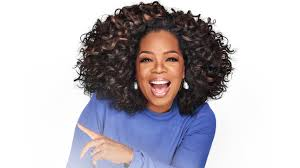

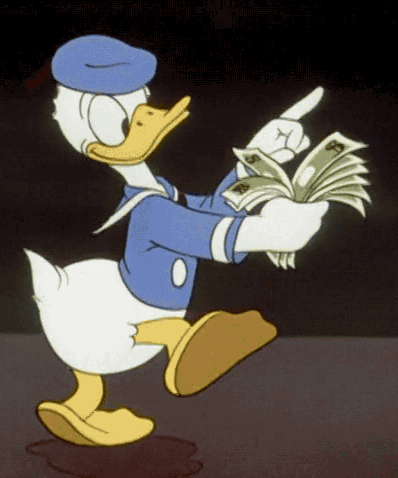

This dataset contains 4 columns and 1547 rows (number of rows will be increased each year). As of 2020, the dataset covers a span of 15 years of celebrity earnings since 2005

In [138]:
df = pd.read_csv("/kaggle/input/forbes-celebrity-100-since-2005/forbes_celebrity_100.csv")

let's pick in the data

In [139]:
df.head()

Name  Pay (USD millions)  Year             Category
0     Oprah Winfrey               225.0  2005        Personalities
1       Tiger Woods                87.0  2005             Athletes
2        Mel Gibson               185.0  2005               Actors
3      George Lucas               290.0  2005  Directors/Producers
4  Shaquille O'Neal                33.4  2005             Athletes

find out if it clean

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                1547 non-null   object 
 1   Pay (USD millions)  1547 non-null   float64
 2   Year                1547 non-null   int64  
 3   Category            1547 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 48.5+ KB


very clean data.

always make sure the data is clean or talking in the same language

there are 1547 view point in the data and all of them are non-null.

keep an eye out on the dtype of the variables they might make you a hard life when you will manipulate the data




In [141]:
df.index

RangeIndex(start=0, stop=1547, step=1)

i wish the index of the data was just the name of the celeb

lets make reset the index.

In [142]:
df= df.set_index("Name")

lets see if this work

In [143]:
df.head()

Pay (USD millions)  Year             Category
Name                                                           
Oprah Winfrey                  225.0  2005        Personalities
Tiger Woods                     87.0  2005             Athletes
Mel Gibson                     185.0  2005               Actors
George Lucas                   290.0  2005  Directors/Producers
Shaquille O'Neal                33.4  2005             Athletes

# great!!!

who are the most 10 paid celebrities

In [144]:
biggest_ten_celeb = df["Pay (USD millions)"].nlargest(10)

In [145]:
biggest_ten_celeb

Name
Dr. Dre             620.0
Steven Spielberg    332.0
Oprah Winfrey       315.0
Howard Stern        302.0
J.K. Rowling        300.0
Floyd Mayweather    300.0
George Lucas        290.0
Oprah Winfrey       290.0
Floyd Mayweather    285.0
Oprah Winfrey       275.0
Name: Pay (USD millions), dtype: float64

the easy is to plot this in plot bar

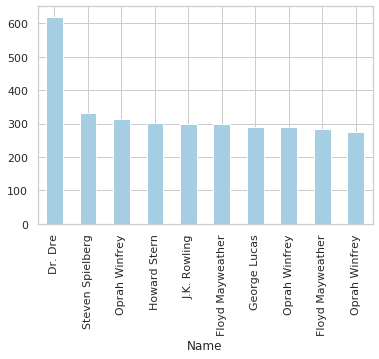

In [146]:
biggest_ten_celeb.plot(kind="bar",colormap='Paired')

this kind of the data cant provide us alot of info so we need to group by try with Category

In [147]:
df_grup_by_Category = df.groupby(["Category","Name"])["Pay (USD millions)"].mean()

In [148]:
df_grup_by_Category

Category              Name            
Actors                Adam Sandler        40.384615
                      Akshay Kumar        41.000000
                      Alec Baldwin         9.875000
                      Amitabh Bachchan    33.500000
                      Anthony Robbins     30.000000
                                            ...    
Television actresses  Sofia Vergara       36.900000
                      Teri Hatcher         9.000000
                      The Olsen Twins     30.500000
                      Tina Fey             8.850000
                      Vanessa Williams     4.500000
Name: Pay (USD millions), Length: 434, dtype: float64

ok now we have the Category and the name as a group by that is useful

we want again to find out who are the 10 most richest celeb but now its with  there category

In [149]:
df_grup_by_Category.nlargest(10)

Category             Name            
Personalities        Oprah Winfrey       218.900000
Actors               Mel Gibson          185.000000
Directors/Producers  George Lucas        155.000000
                     James Cameron       140.000000
                     Steven Spielberg    133.900000
Musicians            Dr. Dre             130.500000
                     The Police          115.000000
Athletes             Floyd Mayweather    114.625000
Directors/Producers  Michael Bay         107.000000
Musicians            U2                  106.333333
Name: Pay (USD millions), dtype: float64

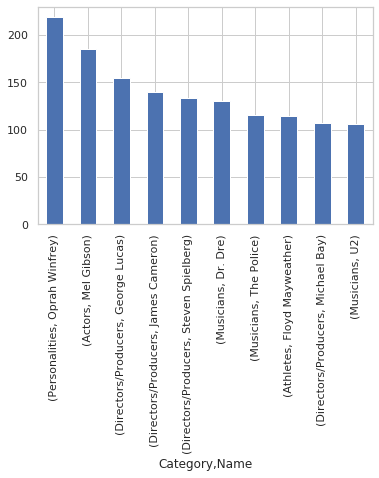

In [150]:
df_grup_by_Category.nlargest(10).plot(kind="bar")


maybe it will be better to add the year as groupby

In [151]:
df_grup_by_Category_year = df.groupby(["Year","Category","Name"])["Pay (USD millions)"].mean()

In [152]:
df_grup_by_Category_year.nlargest(10)

Year  Category             Name            
2014  Musicians            Dr. Dre             620.0
2006  Directors/Producers  Steven Spielberg    332.0
2010  Personalities        Oprah Winfrey       315.0
2006  Personalities        Howard Stern        302.0
2008  Authors              J.K. Rowling        300.0
2015  Athletes             Floyd Mayweather    300.0
2005  Directors/Producers  George Lucas        290.0
2011  Personalities        Oprah Winfrey       290.0
2018  Athletes             Floyd Mayweather    285.0
2008  Personalities        Oprah Winfrey       275.0
Name: Pay (USD millions), dtype: float64

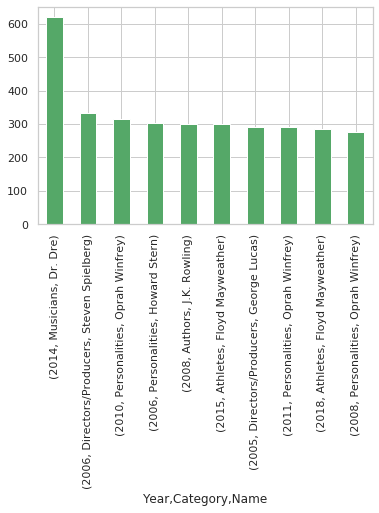

In [153]:
df_grup_by_Category_year.nlargest(10).plot(kind="bar",color="g")

check correlation with method of spearman 

In [154]:
spearmanr(df["Category"],df["Pay (USD millions)"])

SpearmanrResult(correlation=0.11225133951452783, pvalue=9.6225818279662e-06)

In [155]:
spearmanr(df["Year"],df["Pay (USD millions)"])

SpearmanrResult(correlation=0.4315942578909298, pvalue=3.278531827352277e-71)

check who are the poorest celeb

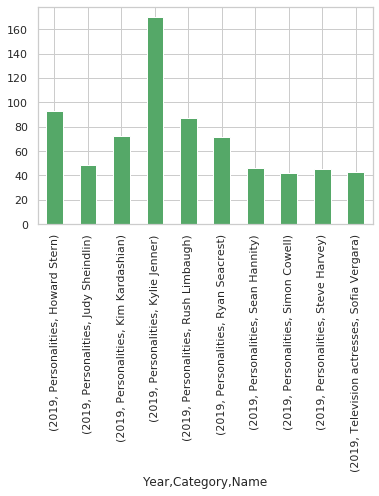

In [156]:
df_grup_by_Category_year.tail(10).plot(kind="bar",color="g")

In [157]:
df.Category.unique()

array(['Personalities', 'Athletes', 'Actors', 'Directors/Producers',
       'Musicians', 'Authors', 'Comedians', 'Television actresses',
       'Actresses', 'Magicians', 'Models', 'Television actors',
       'Hip-hop impresario'], dtype=object)

to predict if catgoriel we need to transform them to dummy variable

In [158]:
df_with_dummy_var = pd.get_dummies(df, columns=['Category'])

In [159]:
df_with_dummy_var.head()

Pay (USD millions)  Year  Category_Actors  \
Name                                                          
Oprah Winfrey                  225.0  2005                0   
Tiger Woods                     87.0  2005                0   
Mel Gibson                     185.0  2005                1   
George Lucas                   290.0  2005                0   
Shaquille O'Neal                33.4  2005                0   

                  Category_Actresses  Category_Athletes  Category_Authors  \
Name                                                                        
Oprah Winfrey                      0                  0                 0   
Tiger Woods                        0                  1                 0   
Mel Gibson                         0                  0                 0   
George Lucas                       0                  0                 0   
Shaquille O'Neal                   0                  1                 0   

                  Category_Comedians  Category_Directors/Producers  \
Name                                                                 
Oprah Winfrey                      0                             0   
Tiger Woods                        0                             0   
Mel Gibson                         0                             0   
George Lucas                       0                             1   
Shaquille O'Neal                   0                             0   

                  Category_Hip-hop impresario  Category_Magicians  \
Name                                                                
Oprah Winfrey                               0                   0   
Tiger Woods                                 0                   0   
Mel Gibson                                  0                   0   
George Lucas                                0                   0   
Shaquille O'Neal                            0                   0   

                  Category_Models  Category_Musicians  Category_Personalities  \
Name                                                                            
Oprah Winfrey                   0                   0                       1   
Tiger Woods                     0                   0                       0   
Mel Gibson                      0                   0                       0   
George Lucas                    0                   0                       0   
Shaquille O'Neal                0                   0                       0   

                  Category_Television actors  Category_Television actresses  
Name                                                                         
Oprah Winfrey                              0                              0  
Tiger Woods                                0                              0  
Mel Gibson                                 0                              0  
George Lucas                               0                              0  
Shaquille O'Neal                           0                              0

In [160]:
X = df_with_dummy_var[["Pay (USD millions)","Year"]]
y = df_with_dummy_var['Category_Actors']
y.value_counts()
       

0    1381
1     166
Name: Category_Actors, dtype: int64

* split the data to train and test with train_test_split we cut 0.25 and keep it to test
*  random_state its for keep the same sample all the time

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [162]:
X_train

Pay (USD millions)  Year
Name                                       
Adam Sandler                     55.0  2009
Bruce Springsteen                75.0  2017
Rod Stewart                      31.0  2005
Venus Williams                   15.5  2010
Tom Hanks                        74.0  2007
...                               ...   ...
Bruce Springsteen                60.5  2016
Novak Djokovic                   37.6  2017
Michael Bay                      82.0  2013
Stephen Curry                    79.8  2019
David Copperfield                64.0  2016

[1160 rows x 2 columns]

In [163]:
log_reg = LogisticRegression()

In [164]:
log_reg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [165]:
predictions  = log_reg.predict(X_test)


In [166]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.90      1.00      0.95       348
           1       0.00      0.00      0.00        39

    accuracy                           0.90       387
   macro avg       0.45      0.50      0.47       387
weighted avg       0.81      0.90      0.85       387



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [167]:
score = log_reg.score(X_test, y_test)
print(score)

0.8992248062015504


WOWWW if we know what is the year and what yoy get paid we know if you are acters Our accuracy was 89.9%.